In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
np.random.seed(123)
pop_size = 1000
pop = np.random.randint(0, 500, pop_size)
population = pd.DataFrame({'sales': pop})
population.head()

,sales
0,365
1,382
2,322
3,476
4,98


In [3]:
population.describe()

,sales
count,1000.000000
mean,253.241000
std,146.431435
min,0.000000
25%,124.750000
50%,253.500000
75%,378.000000
max,498.000000


In [4]:
pop_mean = pop.mean()
pop_sd = pop.std()
print("The population mean: {:3.3f}, the population standard deviation: {:3.3f}".format(pop_mean, pop_sd))

The population mean: 253.241, the population standard deviation: 146.358


# Sampling

In [5]:
# two parameters dertermies the sampling mechanism: 1. sample_size: the number of sampling; 2. sampling_num: the size of each sample
def sampling_design(sample_size=100, sampling_num=1000):
    samples_means = np.zeros(sampling_num)
    for i in range(sampling_num):
        per_sample = np.random.choice(pop, sample_size, replace=True)
        samples_means[i] = per_sample.mean()
    return samples_means

sample_size = 200
samples_means = sampling_design(sample_size, 500)

## Sampling Distribution

In [6]:
samples_means[:100]

array([260.485, 241.88 , 257.005, 255.955, 240.08 , 263.725, 259.165,
       249.645, 239.135, 242.41 , 254.865, 268.92 , 261.915, 265.44 ,
       255.73 , 248.98 , 260.205, 246.02 , 263.42 , 248.825, 260.805,
       255.845, 230.23 , 255.13 , 250.995, 276.385, 264.905, 257.53 ,
       278.8  , 248.45 , 246.755, 243.135, 254.02 , 274.065, 259.37 ,
       259.205, 277.17 , 232.765, 253.865, 259.3  , 234.025, 256.025,
       246.195, 260.215, 262.895, 254.91 , 262.61 , 261.965, 234.335,
       256.03 , 260.18 , 266.33 , 248.75 , 246.005, 254.265, 254.85 ,
       263.795, 234.13 , 230.485, 241.39 , 245.405, 238.64 , 253.92 ,
       259.31 , 233.46 , 241.575, 252.845, 234.19 , 260.22 , 253.695,
       262.62 , 243.175, 243.09 , 254.75 , 252.505, 239.615, 254.315,
       228.89 , 254.04 , 266.99 , 261.715, 266.075, 254.89 , 271.395,
       253.05 , 261.455, 247.915, 248.335, 244.675, 251.455, 262.035,
       279.175, 245.5  , 258.445, 256.465, 257.34 , 268.655, 241.1  ,
       242.795, 256.

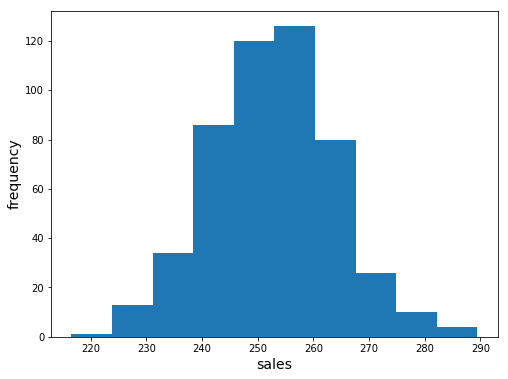

In [17]:
# the frequecy distribution of sample means
plt.figure(figsize=(8, 6))
plt.hist(samples_means)
plt.xlabel("sales", fontsize=14)
plt.ylabel("frequency", fontsize=14)
plt.show()

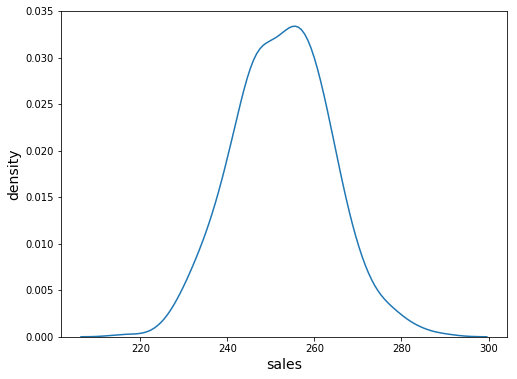

In [18]:
plt.figure(figsize=(8, 6))
sns.kdeplot(samples_means)
plt.xlabel("sales", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.show()

In [19]:
all_samples_mean = samples_means.mean()
all_samples_sd = samples_means.std()

print("The mean of sampling distribution: {}, the standard deviation of sampling distribution: {}".format(all_samples_mean, all_samples_sd))

The mean of sampling distribution: 252.64476000000002, the standard deviation of sampling distribution: 11.067880444890973


# Accessing the fit

### Estimating the Mean

In [20]:
pop_mean_eval = all_samples_mean
#pop_sd_eval = all_samples_sd * np.sqrt(sample_size)
pop_mean_eval

252.64476000000002

### Estimating the Standard Deviation

In [21]:
pop_sd_eval = all_samples_sd * np.sqrt(sample_size)
pop_sd_eval

156.52346631888778

In [22]:
se_approx = all_samples_sd
se_approx

11.067880444890973

### Confidence Intervals

#### 95% confidence interval

In [23]:
confi_inter_lower95 = all_samples_mean - 1.96*se_approx
confi_inter_upper95 = all_samples_mean + 1.96*se_approx
print("95% Confidence Intervals: {}".format([confi_inter_lower95, confi_inter_upper95]))

95% Confidence Intervals: [230.9517143280137, 274.3378056719863]


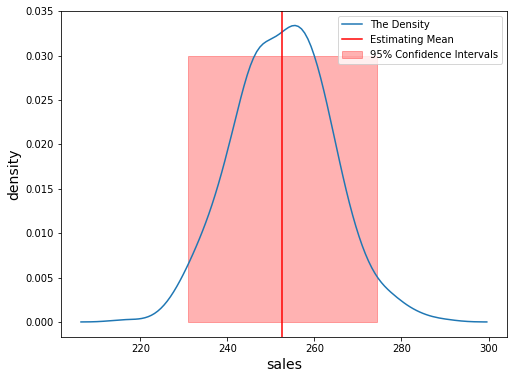

In [24]:
plt.figure(figsize=(8, 6))
sns.kdeplot(samples_means, label='The Density')
plt.axvline(all_samples_mean, ymax=1, color='r', label='Estimating Mean')
plt.fill_betweenx([0, 0.03], confi_inter_lower95, confi_inter_upper95, color='r', alpha=0.3, label='95% Confidence Intervals')

plt.xlabel("sales", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.legend(loc='best')
plt.show()

#### 99% confidence interval

In [27]:
confi_inter_lower98 = all_samples_mean - 2.58*se_approx
confi_inter_upper98 = all_samples_mean + 2.58*se_approx
print("98% Confidence Intervals: {}".format([confi_inter_lower98, confi_inter_upper98]))

98% Confidence Intervals: [224.0896284521813, 281.1998915478187]


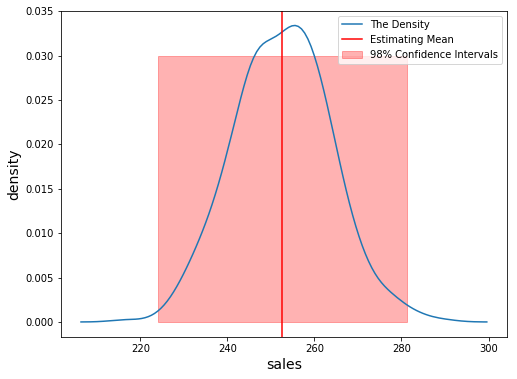

In [30]:
plt.figure(figsize=(8, 6))
sns.kdeplot(samples_means, label='The Density')
plt.axvline(all_samples_mean, ymax=1, color='r', label='Estimating Mean')
plt.fill_betweenx([0, 0.03], confi_inter_lower98, confi_inter_upper98, 
                  color='r', alpha=0.3, label='98% Confidence Intervals')

plt.xlabel("sales", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.legend(loc='best')
plt.show()

In [31]:
sample_sizes = [20, 50, 80, 150, 200, 300, 400, 500, 600, 700, 800, 900]
samples_m = np.zeros(len(sample_sizes))
samples_sd = np.zeros(len(sample_sizes))
i = 0
for s in sample_sizes:
    samples = sampling_design(s, 1000)
    samples_m[i] = samples.mean()
    samples_sd[i] = samples.std()
    i += 1
samples_sd

array([32.38937103, 20.63420443, 16.41702335, 11.88595812, 10.43703287,
        8.41787541,  7.26633459,  6.63437007,  6.01842857,  5.72798374,
        5.01455733,  4.8871582 ])